# Вариант №2 Задание №3

Подключение библиотек

In [31]:
import math  as m
import numpy as np
import matplotlib.pyplot as plt

Начальные данные:

In [32]:
gamma0 = 5 / 3
gamma3 = 7 / 5

r0 = 1e-5

P0 = 1013000
P3 = 1676800

C3 = 36537

U0 = 0
U3 = 12290

Подсчет величин:

In [33]:
r3 = gamma3 * P3 / (C3 * C3)
alpha0 = (gamma0 + 1) / (gamma0 - 1)
alpha3 = (gamma3 + 1) / (gamma3 - 1)
X = P3 / P0
N = 2 * gamma3 / (gamma3 - 1)
M = (U3 - U0) * m.sqrt(r0 / 2 * (P0) * (gamma0 - 1))
V = (2 / (gamma3 - 1)) * m.sqrt(gamma3*(gamma0 - 1) * P3 * r0 / (2 * P0 * r3))

Расчет коэффициентов уравнения:

In [34]:
#a0 = - (M + V) * (M + V) + 1
#a1 =   2 * V * (M + V)
#a2 = - V * V
#a3 = - X * (2 + (M + V) * (M + V) *alpha0)
#a4 =   2 * alpha0 * V * (M + V) * X
#a5 = - alpha0 * V * V * X
#a6 =   X * X
################## 
#a0 =  2.73995
#a1 = -1.2317e+01
#a2 =  2.6292e+01
#a3 = -1.7341e+01
#a4 = -1.86032
#a5 = -3.97095
#a6 = -1.11904
#################
a0 =  9.392122e+10
a1 = -1.652091e+06
a2 =  7.492693e+06
a3 = -9.108296e+06
a4 = -1.347697
a5 =  6.112181
a6 = -5.930113
a = np.array([a0, a1, a2, a3, a4, a5, a6])
absa = np.array([m.fabs(a0), m.fabs(a1), m.fabs(a2), m.fabs(a3), m.fabs(a4), m.fabs(a5), m.fabs(a6)])
Ar = np.array([m.fabs(a5), m.fabs(a4), m.fabs(a3), m.fabs(a2), m.fabs(a1), m.fabs(a0)])
Br = np.array([m.fabs(a6), m.fabs(a5), m.fabs(a4), m.fabs(a3), m.fabs(a2), m.fabs(a1)])
A = max(Ar)
B = max(Br)
print(a[6], a[0])
print(Ar)
print(Br)

-5.930113 93921220000.0
[  6.11218100e+00   1.34769700e+00   9.10829600e+06   7.49269300e+06
   1.65209100e+06   9.39212200e+10]
[  5.93011300e+00   6.11218100e+00   1.34769700e+00   9.10829600e+06
   7.49269300e+06   1.65209100e+06]


Лямбда - функции:

L1 - полином

L2 - его первая производная

L3 - вторая

L4 - третья

L5 - четвертая

L6 - пятая

L7 - шестая

In [35]:
#L1 = lambda x:         a[6] * m.pow(x , 2 * N  ) +           a[5] * m.pow(x , N + 2) +           a[4] * m.pow(x , N + 1) +        a[3] * m.pow(x , N  ) +     a[2] * m.pow(x , 2) + a[1] * x + a[0]
#L2 = lambda x: 2 * N * a[6] * m.pow(x , 2 * N-1) + (N + 2) * a[5] * m.pow(x , N + 1) +     (N + 1) * a[4] * m.pow(x , N    ) + N *    a[3] * m.pow(x , N-1) + 2 * a[2] * x +            a[1]
#L1 = lambda x:       a[6] * m.pow(x , 6) +       a[5] * m.pow(x , 5) +      a[4] * m.pow(x , 4) +     a[3] * m.pow(x , 3) +     a[2] * m.pow(x , 2) + a[1] * x + a[0]
#L2 = lambda x: 6 *   a[6] * m.pow(x , 5) + 5   * a[5] * m.pow(x , 4) + 4  * a[4] * m.pow(x , 3) + 3 * a[3] * m.pow(x , 2) + 2 * a[2] * x + a[1]  
#L3 = lambda x: 30 *  a[6] * m.pow(x , 4) + 20  * a[5] * m.pow(x , 3) + 12 * a[4] * m.pow(x , 2) + 6 * a[3] * x + 2 * a[2]
#L4 = lambda x: 120 * a[6] * m.pow(x , 3) + 60  * a[5] * m.pow(x , 2) + 24 * a[4] * x + 6 * a[3] 
#L5 = lambda x: 360 * a[6] * m.pow(x , 2) + 120 * a[5] * x + 24 * a[4] 
#L6 = lambda x: 720 * a[6] * x + 90 * a[5]
#L7 = lambda x: 720 * a[6]

       6         5         4             3             2
-5.93 x + 6.112 x - 1.348 x - 9.108e+06 x + 7.493e+06 x - 1.652e+06 x + 9.392e+10
        5         4         3             2
-35.58 x + 30.56 x - 5.391 x - 2.732e+07 x + 1.499e+07 x - 1.652e+06


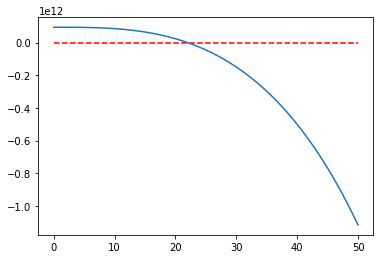

In [36]:
L1 = np.poly1d([a[6], a[5], a[4], a[3], a[2], a[1], a[0]])
L2 = np.poly1d([6 * a[6], 5 * a[5], 4 * a[4], 3 * a[3], 2 * a[2], a[1]])
print(L1)
print(L2)

nx = np.linspace(0,50,1000)
z = np.zeros(1000)
plt.plot(nx,z,'r--', nx, L1(nx))
plt.show()

Определение кольца

In [7]:
Z1 = m.fabs(a0) / (m.fabs(a0) + B)
Z2 = 1 + A / m.fabs(a6)
print([Z1, Z2])

[0.99990303136201875, 15838015229.377604]


In [8]:
def decarte(a):
    st = 0
    for i in range(6):
        if((a[i] * a[i + 1] < 0)):
            st += 1
    return st

Количество корней по теореме Декарта

In [9]:
decarte(a)

5

Метод Штурма

In [10]:
def Shturm(A, B):
    n = 0
    m = 0
    Sa = []
    Sb = []
    Sa.append(L1(A))
    Sb.append(L1(B))
    Sa.append(L2(A))
    Sb.append(L2(B))
    #print(L1)
    #print(L2)
    
    rem1 = np.polydiv(L1, L2)
    S3 = np.poly1d(-rem1[1])
    #print(S3)
    Sa.append(S3(A))
    Sb.append(S3(B))
    
    rem2 = np.polydiv(L2, S3)
    S4 = np.poly1d(-rem2[1])
    #print(S4)
    Sa.append(S4(A))
    Sb.append(S4(B))
   
    rem3 = np.polydiv(S3, S4)
    S5 = np.poly1d(-rem3[1])
    #print(S5)
    Sa.append(S5(A))
    Sb.append(S5(B))
    
    rem4= np.polydiv(S4,S5)
    S6 = np.poly1d(-rem4[1])
    #print(S6)
    Sa.append(S6(A))
    Sb.append(S6(B))
    
    rem5= np.polydiv(S5, S6)
    S7 = np.poly1d(-rem5[1])
    #print(S7)
    Sa.append(S7(A))
    Sb.append(S7(B))
    #print('....................................................................................................................')
    #print(Sa)
    #print(Sb)
    #print('....................................................................................................................')
    
    for i in range(0, 6):
        if (Sa[i] * Sa[i + 1] < 0):
            n += 1
    for i in range(0, 6):
        if (Sb[i] * Sb[i + 1] < 0):
            m += 1
    if (n - m) >= 0:
        res = n - m
    else:
        res = m - n
    return(res)

Количество корней методом Штурма

In [11]:
rootsS = Shturm(Z1,Z2)
print('number of roots:',rootsS)

number of roots: 1


Метод Ньютона

In [12]:
def Newton(a, b, eps):
    x0 = (a + b) / 2
    while 1:
        x1 = x0 - L1(x0) / L2(x0)
        if m.fabs(x1 - x0) < eps:
            break
        x0 = x1
    return (x1)

In [13]:
Newton(Z1 , Z2, 1e-12)

21.99120224648588

Метод бинарного поиска

In [17]:
def Binary(a, b, eps):
    k = 0
    if (Shturm(a, b) == 0):
        return()
    if (Shturm(a, b) == 1):
        if k == rootsS:
            return()
        print('Interval:', a, b)
        x = Newton(a, b, eps)
        print('Root:', x)
        k += 1
    else:
        half = (a + b) / 2
        return(Binary(a, half), Binary(half, b), eps)

In [22]:
print (Binary(Z1,Z2,1e-12))
print(L1)
print(L2)

Interval: 0.999903031362 15838015229.4
Root: 21.9912022465
None
       6         5         4             3             2
-5.93 x + 6.112 x - 1.348 x - 9.108e+06 x + 7.493e+06 x - 1.652e+06 x + 9.392e+10
        5         4         3             2
-35.58 x + 30.56 x - 5.391 x - 2.732e+07 x + 1.499e+07 x - 1.652e+06


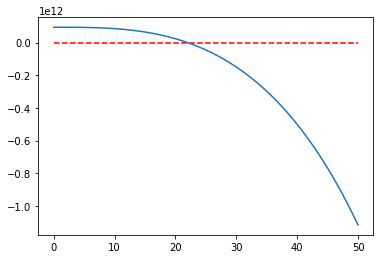